In [1]:
# Import necessary libraries
#from sklearn.metrics import accuracy_score


In [2]:

import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score


pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.float_format = '{:.6f}'.format
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

This code configures Pandas and Matplotlib settings for comprehensive data analysis. It also imports regression metrics from Scikit-Learn for model evaluation. Warning messages are suppressed to improve code readability.

In [3]:
df = pd.read_csv("HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.000000,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.000000,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.000000,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.000000,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.000000,male,ear


In [4]:
df.shape

(10015, 7)

# The output "(10015, 7)" indicates that the DataFrame 'df' has 10,015 rows and 7 columns.

# EDA 

In [5]:
# Categories of the diferent diseases
#lesion_type_dict = {
    #'nv': 'Melanocytic nevi',
    #'mel': 'Melanoma',
    #'bkl': 'Benign keratosis ',
    #'bcc': 'Basal cell carcinoma',
    #'akiec': 'Actinic keratoses',
    #'vasc': 'Vascular lesions',
    #'df': 'Dermatofibroma'
#}

#df['lesion'] = df.dx.map(lesion_type_dict)
#df.head()

In [6]:
#print(df.lesion.value_counts())

In [7]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


The 'age' column in the DataFrame has 9,958 non-null entries. The average age is approximately 51.86, with a standard deviation of 16.97. The minimum age is 0, and the maximum age is 85. The 25th, 50th, and 75th percentiles are 40, 50, and 65, respectively.

In [8]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

The output indicates the count of missing values (null values) in each column of the DataFrame 'df':

'lesion_id', 'image_id', 'dx', 'dx_type', 'sex', and 'localization' columns have no missing values (count is 0).

In [9]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

The code fills missing values in the 'age' column with the mean age in the DataFrame 'df'.

In [10]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

The DataFrame 'df' is now free of missing values, with all columns having no null entries.

In [11]:
#df_cat = df.select_dtypes(include="object")
#df_cat.head(2)

In [12]:
#df_num = df.select_dtypes(include='number')
#df_num.head(2)

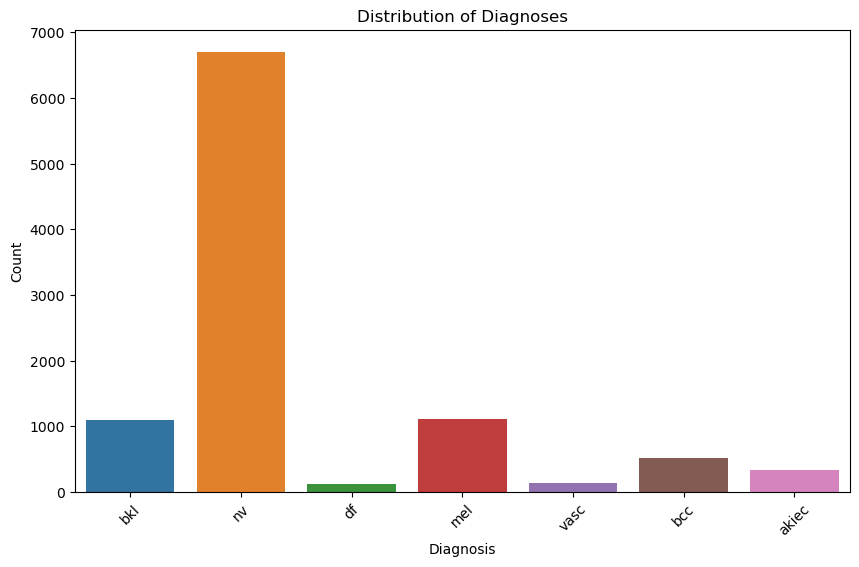

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnoses')
plt.xticks(rotation=45)
plt.show()


The countplot indicates that the 'nv'== **"melanocytic nevi"** diagnosis category has a higher count compared to other diagnosis categories, while the 'df' category has a lower count. This suggests an imbalance in the distribution of diagnoses within the dataset.

('nv', ' melanocytic nevi'),
('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')} 

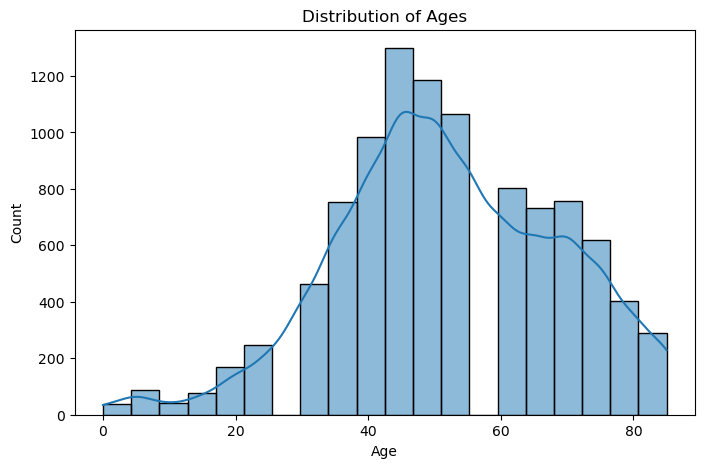

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()


The histogram illustrates a peak in the frequency of ages between 50 and 60, indicating a concentration of individuals within this age range in the dataset.

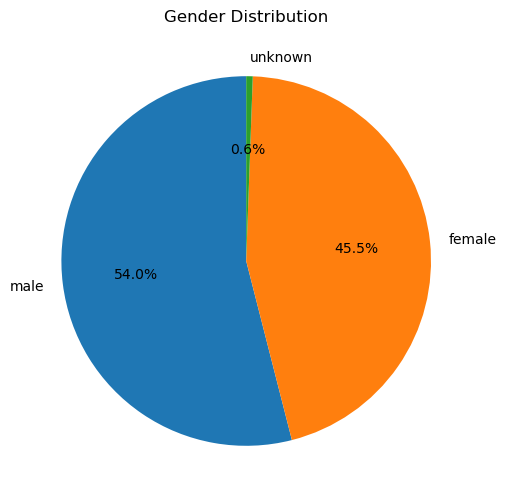

In [15]:
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


Approximately 45.5% of the individuals are female.

Approximately 54.0% of the individuals are male.

A small percentage (0.6%) is labeled as unknown or has missing values.

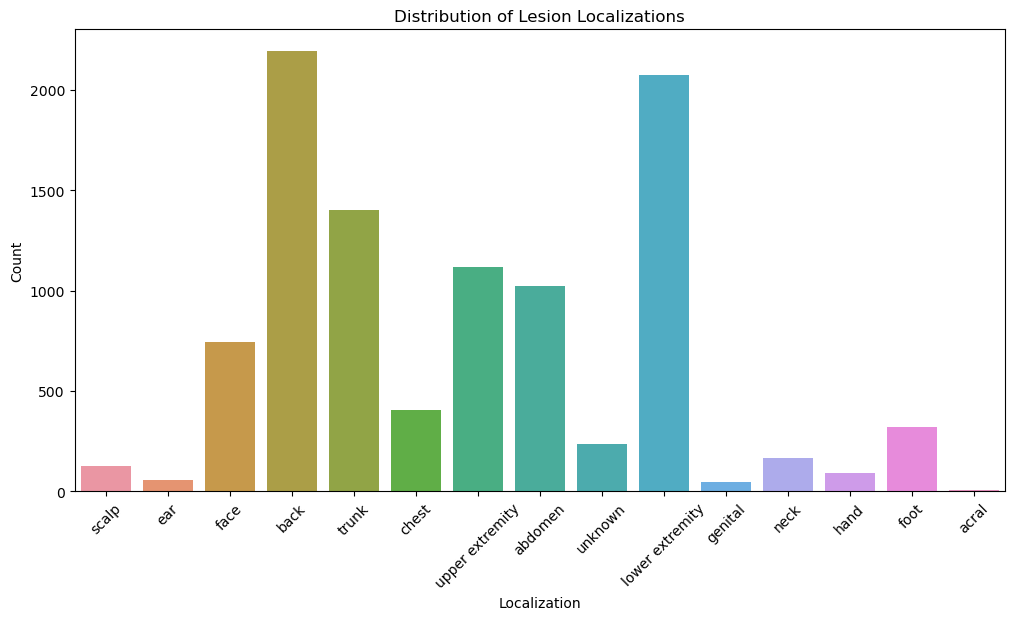

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='localization')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.title('Distribution of Lesion Localizations')
plt.xticks(rotation=45)
plt.show()


The countplot indicates a higher frequency of skin lesions on the "back" compared to the "acral" (lower extremity) area in the dataset.

In [17]:
#df['sex'].nunique(dropna= True)

In [18]:

#df.nunique(axis=0, dropna=True)

In [19]:
#df["sex"].fillna("other", inplace = True)

In [20]:
#sns.lineplot(x ='lesion',y="sex", data = df, palette = "Orange") 
#plt.xticks(rotation=30)
#plt.show()

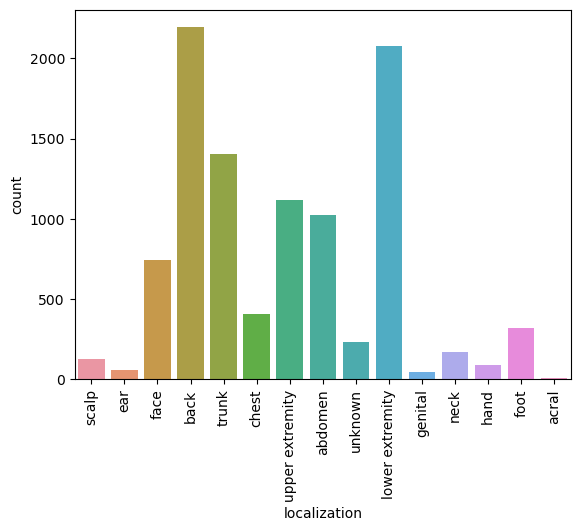

In [21]:
sns.countplot(x ='localization', data = df) 
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.000000,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.000000,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.000000,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.000000,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.000000,male,ear


<Axes: xlabel='dx_type', ylabel='count'>

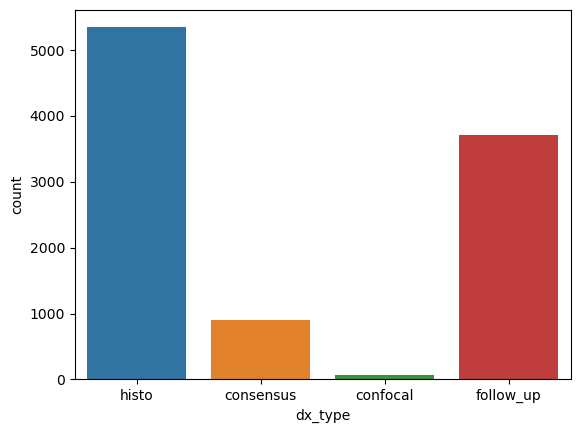

In [23]:
sns.countplot(data=df,x="dx_type")

In [24]:
df['dx_type'].unique() 

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

In [25]:
df['dx'].unique() 

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

<Axes: xlabel='dx', ylabel='count'>

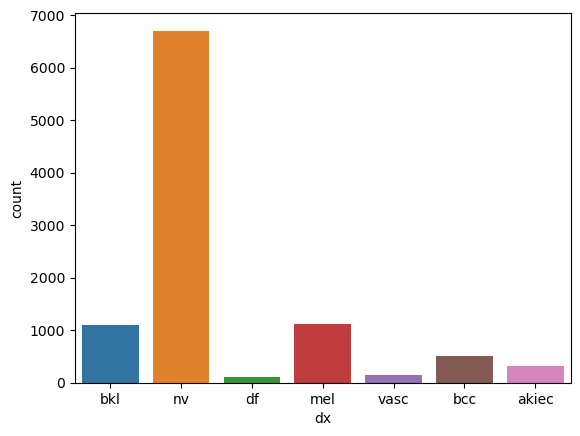

In [26]:
sns.countplot(data=df,x="dx")

In [27]:
df.head(1)
df['age'] = df['age'].astype(int)

In [28]:
df.head(1)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     10015 non-null  object
 1   image_id      10015 non-null  object
 2   dx            10015 non-null  object
 3   dx_type       10015 non-null  object
 4   age           10015 non-null  int32 
 5   sex           10015 non-null  object
 6   localization  10015 non-null  object
dtypes: int32(1), object(6)
memory usage: 508.7+ KB


In [30]:
df['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [31]:


# Define a mapping dictionary
sex_mapping = {
    'male': 0,
    'female': 1,
    'unknown':-1
}

# Map values in the 'Sex' column to 0 and 1 using the mapping dictionary
df['sex'] = df['sex'].map(sex_mapping)

# Display the updated DataFrame

The code maps categorical values in the 'sex' column to numerical values (0 for 'male', 1 for 'female', -1 for 'unknown') in the DataFrame 'df', facilitating numerical representation for further analysis or modeling.

In [32]:
df.head(1)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80,0,scalp


In [33]:
df['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [34]:
df['image_id'].unique()

array(['ISIC_0027419', 'ISIC_0025030', 'ISIC_0026769', ...,
       'ISIC_0033536', 'ISIC_0032854', 'ISIC_0032258'], dtype=object)

In [35]:
df['lesion_id'].unique()

array(['HAM_0000118', 'HAM_0002730', 'HAM_0001466', ..., 'HAM_0005579',
       'HAM_0001576', 'HAM_0002867'], dtype=object)

In [36]:
df['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['localization'] = label_encoder.fit_transform(df['localization'])
df['dx'] = label_encoder.fit_transform(df['dx'])
df['dx_type'] = label_encoder.fit_transform(df['dx_type'])


The code uses `LabelEncoder` from scikit-learn to transform categorical values in the 'localization,' 'dx,' and 'dx_type' columns to numerical representations in the DataFrame 'df.' This conversion is useful for preparing categorical data for machine learning models that require numerical input.

In [38]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,2,3,80,0,11
1,HAM_0000118,ISIC_0025030,2,3,80,0,11
2,HAM_0002730,ISIC_0026769,2,3,80,0,11
3,HAM_0002730,ISIC_0025661,2,3,80,0,11
4,HAM_0001466,ISIC_0031633,2,3,75,0,4


In [39]:
df_num=df.select_dtypes(include="number")
df_num.head()

,dx,dx_type,age,sex,localization
0,2,3,80,0,11
1,2,3,80,0,11
2,2,3,80,0,11
3,2,3,80,0,11
4,2,3,75,0,4


The code creates a new DataFrame 'df_num' containing only numerical columns from the original DataFrame 'df'.

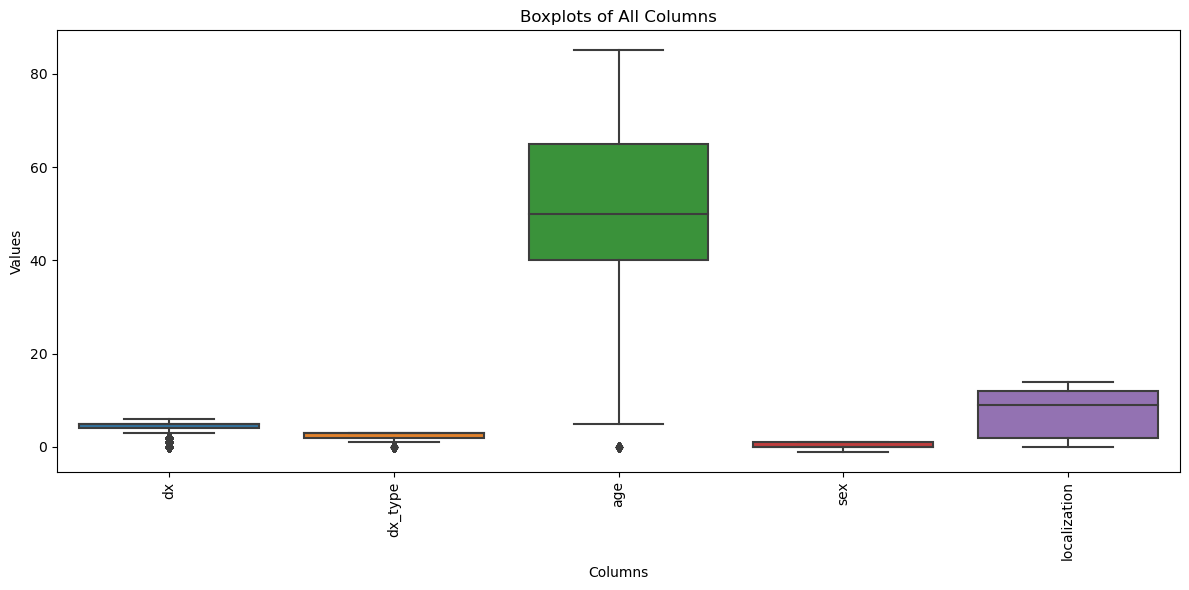

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for each numerical column
sns.boxplot(data=df, orient="v")

# Set plot labels and title
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Boxplots of All Columns")

# Show the plot
plt.tight_layout()
plt.show()

<Axes: >

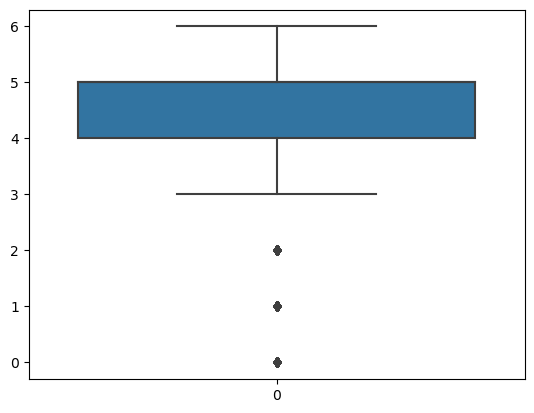

In [41]:
sns.boxplot(data=df['dx'], orient="v")


<Axes: >

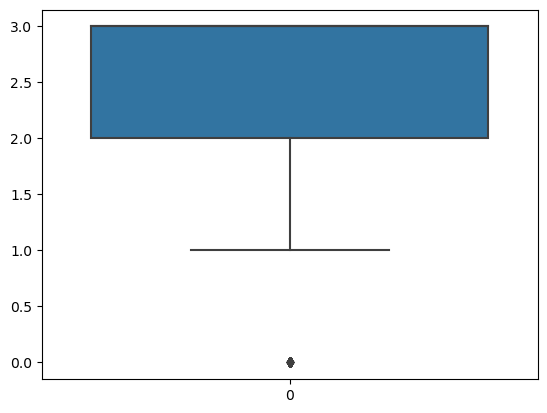

In [42]:
sns.boxplot(data=df['dx_type'], orient="v")


<Axes: >

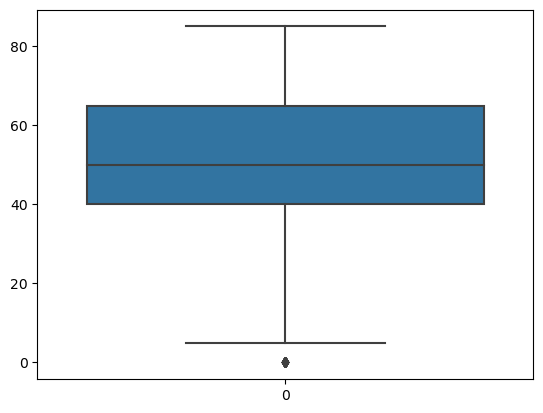

In [43]:
sns.boxplot(data=df['age'], orient="v")


<Axes: >

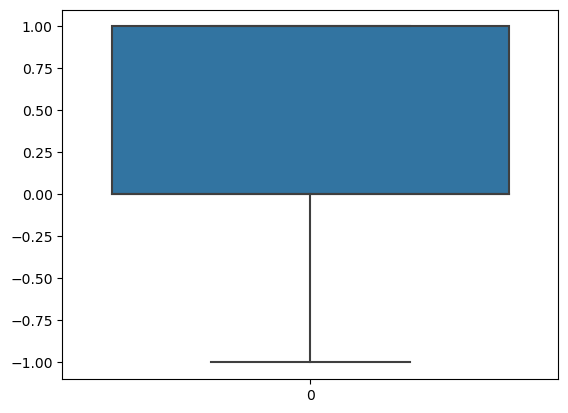

In [44]:
sns.boxplot(data=df['sex'], orient="v")


<Axes: >

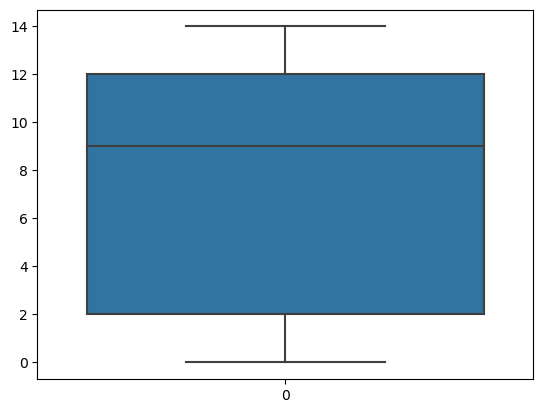

In [45]:
sns.boxplot(data=df['localization'], orient="v")


In [46]:
# initice the stander scaler
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

The code initializes a Min-Max Scaler (`MinMaxScaler`) from scikit-learn, assigning it to the variable 'ss.' This scaler will be used for scaling numerical features to a specified range, typically between 0 and 1.

In [47]:
# fit the numerical data
scaled = ss.fit_transform(df_num)

The code applies the Min-Max Scaler (`ss`) to fit and transform the numerical data in the DataFrame 'df_num,' resulting in the scaled data stored in the variable 'scaled.' This process scales the numerical features to a specified range, often between 0 and 1.

In [48]:
scaled

array([[0.33333333, 1.        , 0.94117647, 0.5       , 0.78571429],
       [0.33333333, 1.        , 0.94117647, 0.5       , 0.78571429],
       [0.33333333, 1.        , 0.94117647, 0.5       , 0.78571429],
       ...,
       [0.        , 1.        , 0.47058824, 0.5       , 0.        ],
       [0.        , 1.        , 0.94117647, 0.5       , 0.35714286],
       [0.66666667, 1.        , 0.82352941, 1.        , 0.14285714]])

In [49]:
df_scaled = pd.DataFrame(scaled ,columns = df_num.columns) 

In [50]:
df_scaled.head(5)

,dx,dx_type,age,sex,localization
0,0.333333,1.000000,0.941176,0.500000,0.785714
1,0.333333,1.000000,0.941176,0.500000,0.785714
2,0.333333,1.000000,0.941176,0.500000,0.785714
3,0.333333,1.000000,0.941176,0.500000,0.785714
4,0.333333,1.000000,0.882353,0.500000,0.285714


In [51]:
# y is our dependent variable(target variable)
X = df_scaled.drop('dx',axis=1)
Y = df_scaled['dx']


In [52]:
# x = our remaining indepedent variable
#X = df_scaled.drop('age',axis = 1)

In [53]:
# X (train, test) , Y
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split( X, Y, test_size = 0.20, random_state=41 )

The code splits the features (X) and labels (Y) into training and testing sets (80-20 split) using scikit-learn's `train_test_split`.

In [54]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)

x_train (8012, 4)
x_test (2003, 4)


In [55]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (8012,)
y_test (2003,)


In [56]:
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# Build a Random Forest Classifier
regressor =RandomForestRegressor()

The code imports RandomForestRegressor and initializes a regressor for building a Random Forest regression model.

In [57]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

The code trains the RandomForestRegressor model ('regressor') on the provided training data (`x_train`, `y_train`).

In [58]:
# Make predictions
y_pred = regressor.predict(x_test)
# lm = LogisticRegression()

In [59]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


The code evaluates the RandomForestRegressor model by calculating the Mean Squared Error (MSE) and R-squared (R2) scores using the test data (`y_test`, `y_pred`). These metrics provide insights into the model's performance in predicting the target variable.

In [60]:
# Print the results
print(f"Mean Squared Error (MSE)",mse)

Mean Squared Error (MSE) 0.033789531715270146


These metrics provide an assessment of the accuracy and goodness of fit of the regression model. The lower MSE  generally indicate better predictive performance.

In [61]:
#lr=LinearRegression()
#lr_model=lr.fit(x_train,y_train)

#X_train_const=sm.add_constant(x_train)
#X_train_const.head()


In [62]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
sv = SVR(kernel='linear', C=1.0)
sv.fit(x_train, y_train)

SVR(kernel='linear')

In [63]:
y_pred = regressor.predict(x_test)


In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [65]:
# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.03
R-squared (R2): 0.39
